<a href="https://colab.research.google.com/github/gustavo-candidoo/data-science/blob/main/Codifica%C3%A7%C3%A3o_de_Var%C3%ADaveis_Categ%C3%B3ricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#bibliotecas
!pip install category_encoders
import category_encoders as ce
import pandas as pd

In [ ]:
#criação do df fictício e transformando em dataframe
df = {
    "Nome": ['Gustavo', 'Silvia', 'Ailton', 'Carlos', 'Marcos', 'Gabriela', 'Bruna', 'Bruno', 'Rafaela', 'Giovana', 'Loayne', 'Hallyson', 'Andre', 'Victor', 'Kizzy', 'Abner'],
    "Sexo": ["M", "F", "M", 'M', 'M', 'F', 'F', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M'],
    'Renda': ["Media", 'Baixa', 'Alta', 'Alta', 'Media', 'Media', 'Baixa', 'Alta', 'Alta', 'Media', 'Media', 'Baixa', 'Alta', 'Baixa', 'Media', 'Media'],
    'Idade': [12, 22, 25, 11, 14, 55, 89, 43, 29, 30, 17, 18, 19, 22, 38, 41]
}

df = pd.DataFrame(df)

In [3]:
#análise inicial
df.head()

,Nome,Sexo,Renda,Idade
0,Gustavo,M,Media,12
1,Silvia,F,Baixa,22
2,Ailton,M,Alta,25
3,Carlos,M,Alta,11
4,Marcos,M,Media,14


In [4]:
#consultando as variáveis categóricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nome    16 non-null     object
 1   Sexo    16 non-null     object
 2   Renda   16 non-null     object
 3   Idade   16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [5]:
#filtrando as variáveis categóricas
df_cats = df.select_dtypes(include=['object'])

In [6]:
#resumo estatístico
df_cats.describe()

,Nome,Sexo,Renda
count,16,16,16
unique,16,2,3
top,Gustavo,M,Media
freq,1,9,7


In [7]:
#funções para transformar as variáveis categóricas
from category_encoders.one_hot import OneHotEncoder, OrdinalEncoder

## One Hot Encoding


In [8]:
#objeto e a variável que queremos transformar como parâmetro (sexo)
ohe = OneHotEncoder(cols=['Sexo'])

In [9]:
#objeto com o parâmetro já estabelecido
ohe

OneHotEncoder(cols=['Sexo'])

In [14]:
#treinamento e ajuste
df_ohe = ohe.fit_transform(df_cats)

## Ordinal Encoding

In [11]:
#objeto e a variável que queremos transformar como parâmetro (renda)
orde = OrdinalEncoder(cols=['Renda'])

In [12]:
#treinamento e ajuste
orde.fit_transform(df_cats)

,Nome,Sexo,Renda
0,Gustavo,M,1
1,Silvia,F,2
2,Ailton,M,3
3,Carlos,M,3
4,Marcos,M,1
5,Gabriela,F,1
6,Bruna,F,2
7,Bruno,M,3
8,Rafaela,F,3
9,Giovana,F,1


## Multicolinearidade

In [15]:
#dataframe original, apenas filtrando as variáveis para checar a correlação
df_multico = df_ohe[['Sexo_1', 'Sexo_2']]

<Axes: >

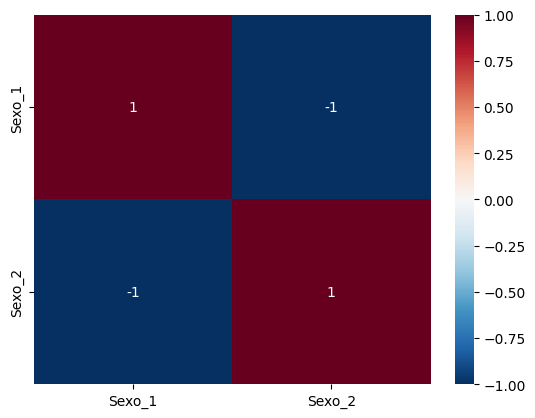

In [20]:
import seaborn as sns

#gráfico de correlação
sns.heatmap(df_multico.corr(),
            cmap='RdBu_r',
            vmin=-1, vmax=1,
            annot=True)

In [23]:
#dropando a segunda coluna para eliminar a multicolinearidade
df_sem_multico = df_ohe.drop(columns=['Sexo_2'])
df_sem_multico.head()

,Nome,Sexo_1,Renda
0,Gustavo,1,Media
1,Silvia,0,Baixa
2,Ailton,1,Alta
3,Carlos,1,Alta
4,Marcos,1,Media
